# (28) N=192 -- KABA

**Motivation**: A new beginning with $N=192$ parcellation on KABA. This time, much larger subcortical ROIs, so that there are many more cortical ones. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Setup

In [2]:
mice = Mice(192)

[PROGRESS] 'config.json' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3

ROI lookup not found, time to run organize_func() . . .

In [3]:
%%time

mice.parcel.fit_parcel(frac=0.1)

Parcellation not found, initiating fit

[PROGRESS] fit columnar: initiated

[PROGRESS] kmeans fit: done

[PROGRESS] save 2D, 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] save 3D, 10um: done

[PROGRESS] downsample: done

num regions,    left: 576,  right: 576
region id diff,         r - l:  Counter({576: 576})

[PROGRESS] fit columnar: done

[PROGRESS] fit subcortical: initiated

[PROGRESS] fit subcortical: done

[PROGRESS] create regions df: done

[PROGRESS] erode: done

[PROGRESS] 'cols_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'brain_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'brain-eroded_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'shape_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'shape_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'shape_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'regions.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] 'fit_meta.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*3/parcellation

[PROGRESS] save results: done.

CPU times: user 47min 40s, sys: 2h 24min 32s, total: 3h 12min 12s
Wall time: 16min 16s


In [6]:
df = mice.parcel.df.copy()

ids_ctx = df.loc[df['acro'] == 'Isocortex', 'id'].values
ids_subctx = df.loc[df['acro'] != 'Isocortex', 'id'].values

len(ids_ctx), len(ids_subctx)

(1152, 302)

In [9]:
len(ids_ctx) + len(ids_subctx)

1454

In [10]:
len(unique_idxs(mice.parcel['brain']))

1454

In [31]:
x2p = mice.parcel['brain']
x2p = mwh(x2p == 0, x2p)
x2p = x2p[70]

for i, ii in enumerate(unique_idxs(x2p)):
    x2p[x2p == ii] = i + 1

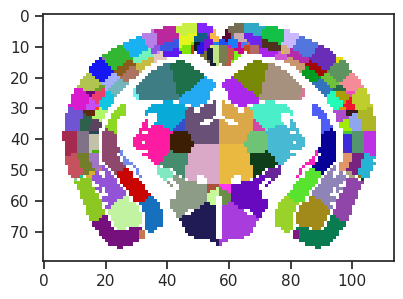

In [34]:
plt.imshow(x2p, cmap=get_rand_cmap(len(unique_idxs(x2p))));

In [11]:
ids_present = unique_idxs(mice.parcel['brain'])

In [12]:
intersection = set(ids_present).intersection(ids_ctx)
intersection = sorted(intersection)
len(intersection)

1152

In [13]:
len(intersection) / 2

576.0

In [14]:
delta = sorted(set(ids_ctx).difference(ids_present))
delta

[]

In [15]:
df.loc[df['id'].isin(delta)]

,id,acro,hemis,region,layer


In [16]:
sum(mice.parcel.fit_meta['subctx_num'].values())

151

In [17]:
mice.parcel.fit_meta

{
    'time_start': '2023_08_30,16:21',
    'ctx_missing': [],
    'subctx_num': {
        'OLF': 22,
        'HIP': 11,
        'RHP': 9,
        'CTXsp': 4,
        'STR': 21,
        'PAL': 4,
        'TH': 9,
        'HY': 7,
        'MB': 17,
        'P': 8,
        'MY': 14,
        'CB': 25
    },
    'subctx_bad': {
        'OLF': 0,
        'HIP': 0,
        'RHP': 0,
        'CTXsp': 0,
        'STR': 0,
        'PAL': 0,
        'TH': 0,
        'HY': 0,
        'MB': 0,
        'P': 0,
        'MY': 0,
        'CB': 0
    },
    'eroded-radii': {
        'Isocortex-0': 2.5437873333889813,
        'Isocortex-1': 2.0184682441218627,
        'Isocortex-2': 1.6907271058997049,
        'OLF': 5.023969719347202,
        'HIP': 5.000323632601484,
        'RHP': 4.5227031649749785,
        'CTXsp': 5.184461760557069,
        'STR': 5.4257770479768315,
        'PAL': 5.528560786220536,
        'TH': 5.155314544003471,
        'HY': 5.097162298683239,
        'MB': 4.995083897271183,
        'P': 5.068436919692104,
        'MY': 5.203863232144686,
        'CB': 5.254255254492351
    },
    'time_end': '2023_08_30,16:37'
}

## Do the masks

In [2]:
from register.register import Register

mice = Mice(
    cfg=192,
    full_load=True,
    load_allen=True,
    load_parcel=True,
)
reg = Register(mice)

In [3]:
obj_all = reg.register_anat(
    save_results=True,
    anchor_ses=2,
)

100%|██████████| 10/10 [05:36<00:00, 33.65s/it]


## Next steps

- Copied masks to Yale server, ran ```./do_xform.sh```
- Copied the resulting 2d masks back to my local computer.
- Ran ```time ./run_register.sh 192```
- Ran ```./run_network.sh 192 3 bold```
- Ran ```time ./loop_svinet.sh 192 3 bold p20-sample 7```

## TODO: currently waiting for run_register to finish

Update: run_register has finished, now time to go to these steps:

...continue with nt_bo -> sv_bo -> gr_bo

## Quickly check how many ROIs missing BOLD

In [2]:
mice = Mice(cfg=192)
mice.setup_func_data()
mice.kws

{
    'task': 'rest',
    'exclude': True,
    'runs_only': True,
    'band_ca2': (0.01, 5.0),
    'band_bold': (0.01, 0.5),
    'desc_ca2': 'preproc',
    'desc_bold': 'rabies-hp'
}

In [3]:
len(mice.bold)

114

In [4]:
bad_all = []
for key in mice.bold:
    data = Base(
        mice,
        key=key,
        mode='bold-lite',
        prep_data=True,
    ).data
    bad = np.isnan(data).sum(1) > 0
    bad_all.append(bad.sum())

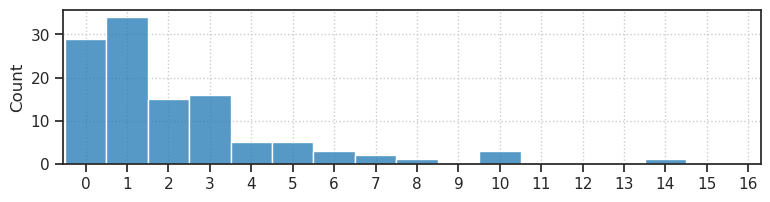

In [18]:
fig, ax = create_figure(1, 1, (9, 2))
sns.histplot(bad_all, bins=np.linspace(0, 16, 17) - 0.5, ax=ax)
ax.locator_params(axis='x', nbins=20)
ax.set_xlim(left=-0.54)
ax.grid()
plt.show()